<a href="https://colab.research.google.com/github/sparab2/MachineLearning/blob/main/Homework3Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [56]:
class LogisticRegressionGradientDescent:
    def __init__(self, learning_rate=0.06, max_iter=100):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.bias = None
        
    def sigmoid(self, x):
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))
    
    def fit(self, X, y):
        # Initializing the weights and the bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient descent algorithm
        for i in range(self.max_iter):
            # Calculate the linear combination of weights and features
            linear_model = np.dot(X, self.weights) + self.bias
            
            # Apply the sigmoid function to get the predicted probabilities
            y_pred = self.sigmoid(linear_model)
            
            # Compute the gradient of the loss function with respect to the weights and bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            # Update the weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
        
    def predict(self, X):
        # Calculate the linear combination of weights and features
        linear_model = np.dot(X, self.weights) + self.bias
        
        # Apply the sigmoid function to get the predicted probabilities
        y_pred = self.sigmoid(linear_model)
        
        # Convert the probabilities to binary predictions
        y_pred_binary = np.where(y_pred >= 0.5, 1, 0)
        
        return y_pred_binary

In [57]:
# load the dataset
breast = load_breast_cancer()
X = breast.data
print(X.shape)
Y = breast.target

breast_input = pd.DataFrame(X)
breast_input.head()

(569, 30)


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [58]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(breast.data, breast.target, test_size=0.2, random_state=42)

In [59]:
# Scale the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
# PCA feature extraction
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [61]:
# Train logistic regression model with gradient descent
num_pcs = X_train_pca.shape[1]
accuracies = []
precisions = []
recalls = []
cms = []

for i in range(1, num_pcs+1):
    X_train_pca_i = X_train_pca[:,:i]
    X_test_pca_i = X_test_pca[:,:i]

    lr = LogisticRegressionGradientDescent()
    lr.fit(X_train_pca_i, y_train)
    y_pred = lr.predict(X_test_pca_i)

    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    cms.append(confusion_matrix(y_test, y_pred))

In [62]:
# Print results
print(f"Accuracy scores: {accuracies}")
print(f"Precision scores: {precisions}")
print(f"Recall scores: {recalls}")
print(f'Confusion Matrix:\n{cms}')

Accuracy scores: [0.956140350877193, 0.9912280701754386, 0.9736842105263158, 0.9736842105263158, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771]
Precision scores: [0.9714285714285714, 0.9861111111111112, 0.9722222222222222, 0.9857142857142858, 0.9859154929577465, 0.9859154929577465, 0.9859154929577465, 0.9859154929577465, 0.9859154929577465, 0.9859154929577465, 0.9859154929577465, 0.9859154929577465, 0.9859154929577465, 0.9859154929577465, 0.9859154929577465, 0.9859154929577465, 0.9859154929577465, 0.9859154929577465, 0.98

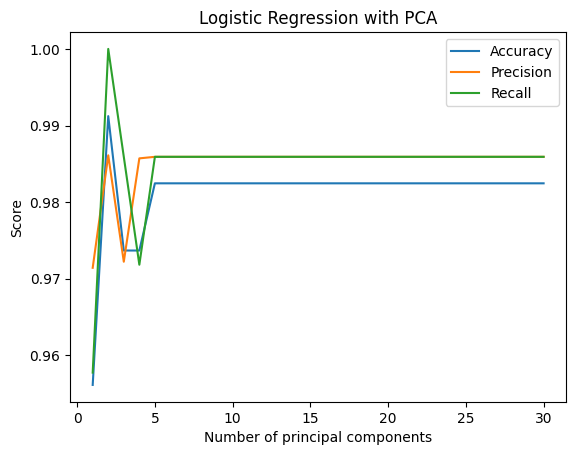

Optimal number of principal components: 2


In [63]:
# Plot results
plt.plot(range(1, num_pcs+1), accuracies, label='Accuracy')
plt.plot(range(1, num_pcs+1), precisions, label='Precision')
plt.plot(range(1, num_pcs+1), recalls, label='Recall')
plt.xlabel('Number of principal components')
plt.ylabel('Score')
plt.title('Logistic Regression with PCA')
plt.legend()
plt.show()

# Identify optimum number of principal components
optimal_num_pcs = np.argmax(accuracies) + 1
print(f'Optimal number of principal components: {optimal_num_pcs}')
